In [1]:
import cartopy.crs as ccrs
import intake
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import numpy as np
import xarray as xr
from tqdm.autonotebook import tqdm
import pyremo as pr
import cordex as cx
import glob
import regionmask

ERROR 1: PROJ: proj_create_from_database: Open of /work/ch0636/g300096/Python/envs/ikercordex/share/proj failed
/tmp/ipykernel_88645/2325055468.py:8: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# we want to keep attributes
xr.set_options(keep_attrs=True)

In [3]:
# create variable info class for model
class modelclass:
    def __init__(self, userexp, runame,plstyle):
        self.userexp = userexp # XXXYYY
        self.runame = runame # name of the run
        self.plstyle = plstyle 
        self.histogram = []

In [4]:
# define the runs to be plotted
modelruns =[] # init

modelruns.append(modelclass("056524","REMO2015","c-"))
modelruns.append(modelclass("036030","REMO2020$_{27}$","r-"))
modelruns.append(modelclass("036031","REMO2020$_{27}$ Shallow","r--"))
modelruns.append(modelclass("036032","REMO2020$_{49}$","b-"))
modelruns.append(modelclass("036033","REMO2020$_{49}$ no-Prog","b--"))
modelruns.append(modelclass("036036","REMO2020$_{49}$ Wetcore","b:"))
modelruns.append(modelclass("036037","REMO2020$_{49}$ Shallow","b-."))

In [5]:
# datapath
dpath = "./data_in/model_data/histogram/"

In [6]:
# figure path
figpath = "./figures/"

In [7]:
# define star year and end year
ystart=2001
yend=2010

In [8]:
for obj in modelruns: # open data
    obj.histogram = xr.open_dataset(dpath+"prudence_1h_precipitation_hist_"+obj.userexp+"_"+str(ystart)+"-"+str(yend)+".nc")

In [9]:
# the regions we want to plot and their order
regorder = ["BI","ME","SC","FR","AL","EA","IP","MD"]

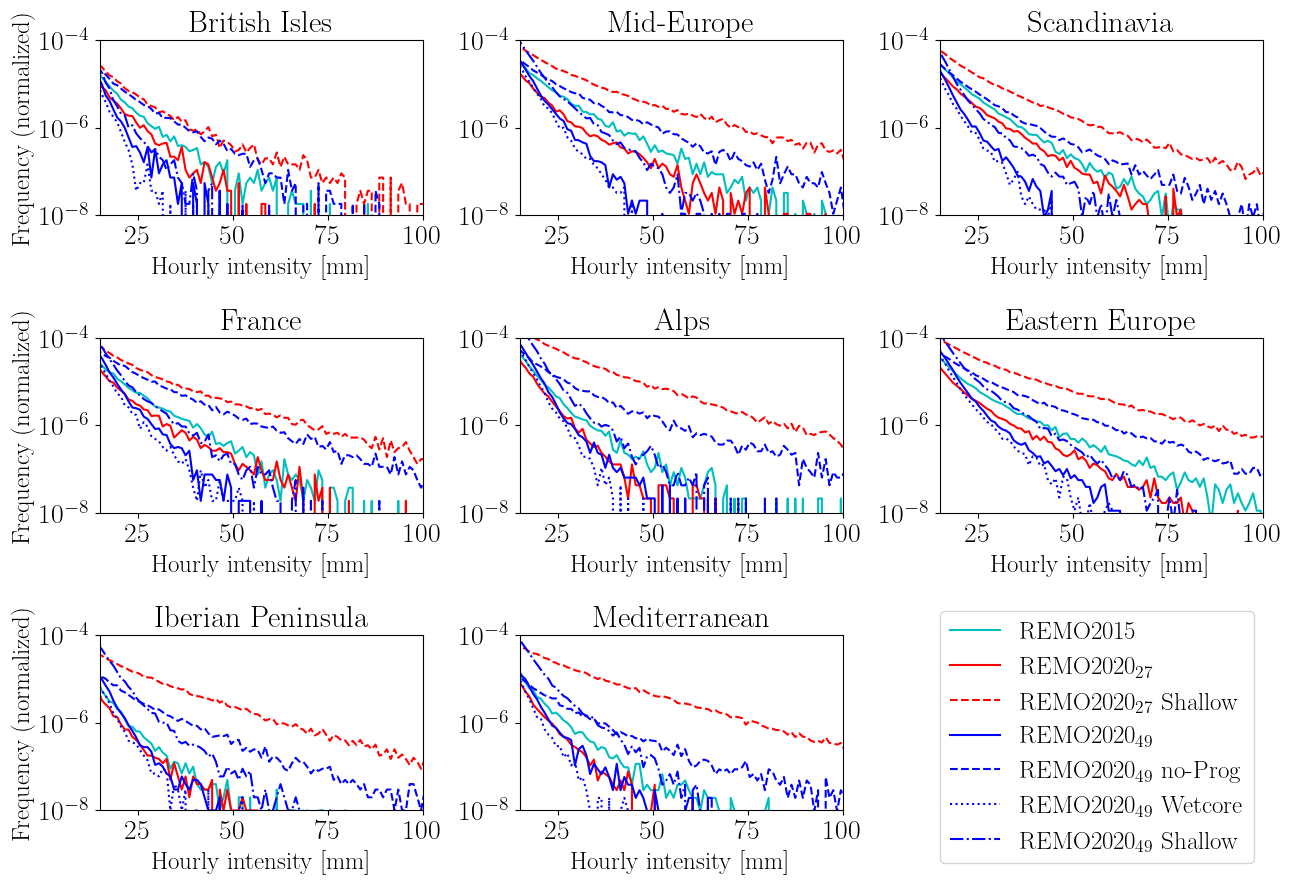

In [11]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["figure.subplot.hspace"] = 0.7
plt.rcParams["axes.titlesize"] = 22
plt.rcParams['axes.labelsize'] = 18
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.rc('legend',fontsize=18)
        
gs = gridspec.GridSpec(3,3)                      

sb=[]
for ind in range(len(regorder)):
    sb = np.append(sb,plt.subplot(gs[ind]))
    for obj in modelruns: # loop over simulations
        plt.semilogy(obj.histogram.bins.values,obj.histogram[regorder[ind]].values/np.sum(obj.histogram[regorder[ind]].values),obj.plstyle)
        titletext = obj.histogram[regorder[ind]].standard_name
        plt.title(titletext)
        plt.xlabel('Hourly intensity [mm]')
        #plt.xticks([0,25,50,75,100,125])
        plt.xlim([15,100])
        plt.xticks([25,50,75,100])
        plt.ylim([1e-8,1e-4])
        plt.yticks([1e-8, 1e-6, 1e-4])
    #
    if(regorder[ind] == "BI" or regorder[ind] == "FR" or regorder[ind] == "IP"):
        plt.ylabel("Frequency (normalized)")

# add some space
plt.subplots_adjust(wspace=0.3)
# make legend
leg=plt.legend(([obj.runame for obj in modelruns]),loc=(1.3,-0.3), ncol=1)
leg.draw_frame(True)
# save figure
plt.savefig(figpath+'1hprecip_histogram_prudence.png',format="png",bbox_inches='tight', pad_inches=0)